In [7]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [9]:
# Load dataset
df = pd.read_csv('heart.csv')

In [11]:
# Inspect & prepare data
print(df.head())
print(df.info())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

In [13]:
# Define features and target
X = df.drop('target', axis=1)
y = df['target']

In [15]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Train Decision Tree
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

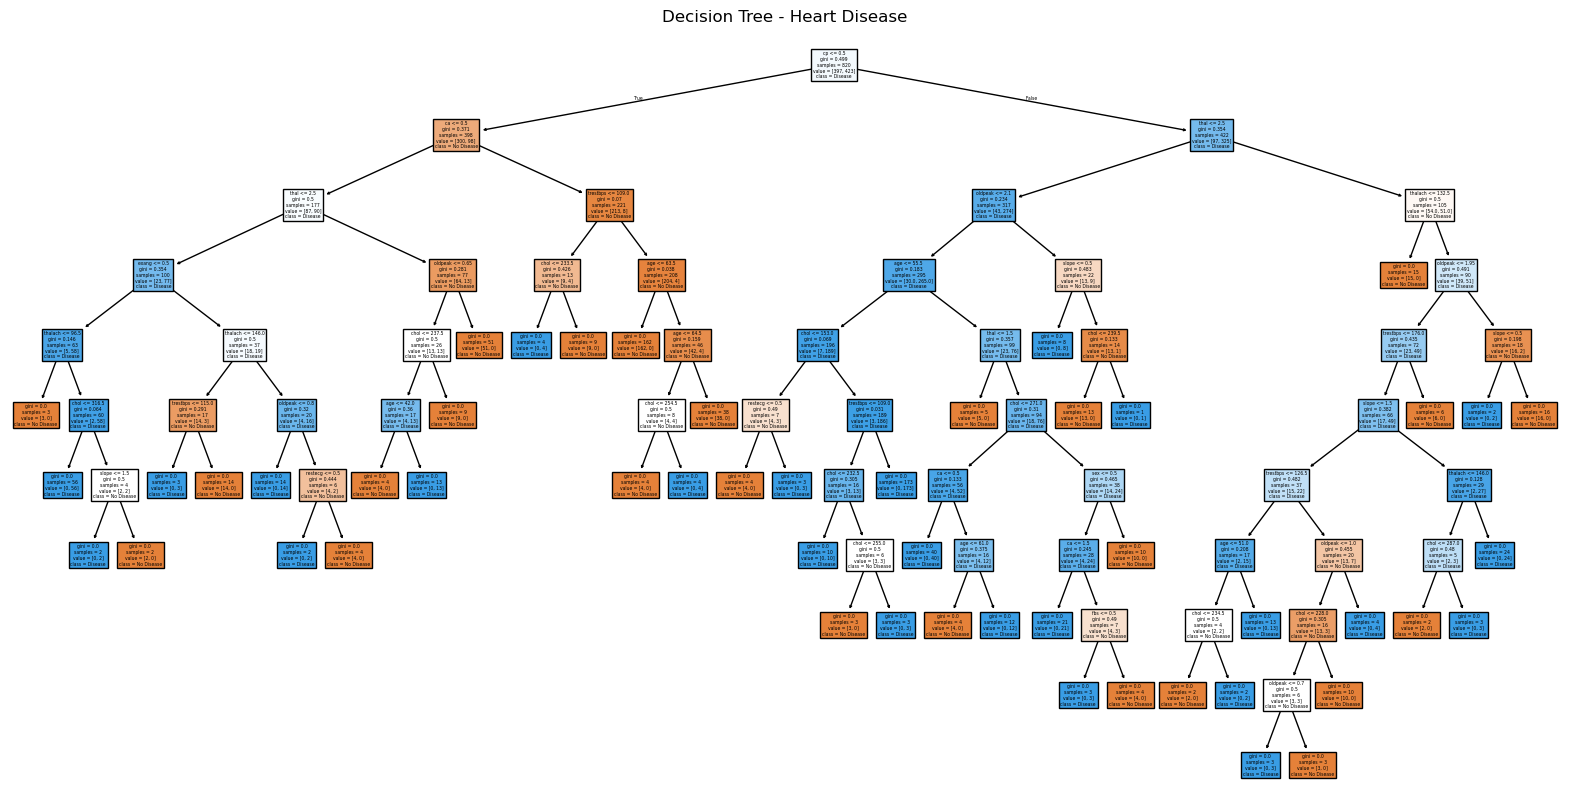

In [19]:
# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(tree_clf, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.title("Decision Tree - Heart Disease")
plt.show()

In [21]:
# Train Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
# Evaluate both models
tree_acc = accuracy_score(y_test, tree_clf.predict(X_test))
rf_acc = accuracy_score(y_test, rf_clf.predict(X_test))

print(f"Decision Tree Accuracy: {tree_acc:.2f}")
print(f"Random Forest Accuracy: {rf_acc:.2f}")

Decision Tree Accuracy: 0.99
Random Forest Accuracy: 0.99


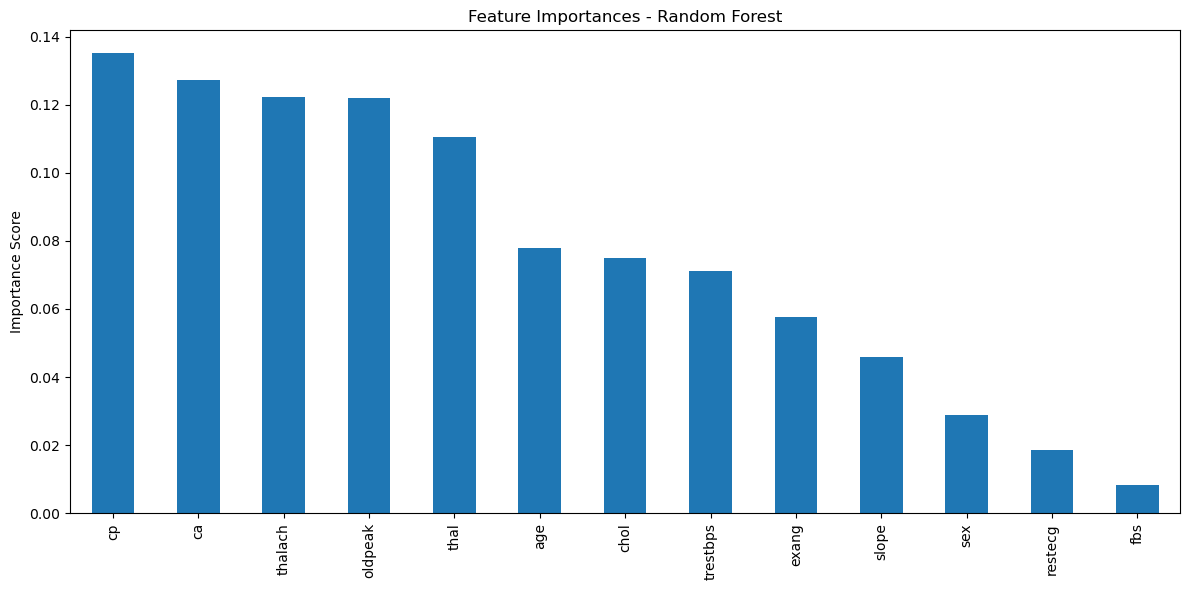

In [28]:
# Feature Importances
importances = pd.Series(rf_clf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title("Feature Importances - Random Forest")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


In [30]:
# Cross-validation accuracy
cv_scores = cross_val_score(rf_clf, X, y, cv=5)
print(f"Cross-validation Accuracy (Random Forest): {cv_scores.mean():.2f}")

Cross-validation Accuracy (Random Forest): 1.00
